<a href="https://colab.research.google.com/github/jhlee508/sparta-pytorch/blob/master/chapter3_sementic_segmentation_PSPNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Git Clone

In [1]:
!git clone https://github.com/YutaroOgawa/pytorch_advanced.git

Cloning into 'pytorch_advanced'...
remote: Enumerating objects: 548, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 548 (delta 34), reused 45 (delta 18), pack-reused 479
Receiving objects: 100% (548/548), 17.75 MiB | 33.35 MiB/s, done.
Resolving deltas: 100% (293/293), done.


In [2]:
%cd pytorch_advanced/

/content/pytorch_advanced


In [3]:
!ls

1_image_classification	 7_nlp_sentiment_transformer
2_objectdetection	 8_nlp_sentiment_bert
3_semantic_segmentation  9_video_classification_eco
4_pose_estimation	 etc
5_gan_generation	 LICENSE
6_gan_anomaly_detection  README.md


In [4]:
%cd 3_semantic_segmentation/

/content/pytorch_advanced/3_semantic_segmentation


In [5]:
!pwd

/content/pytorch_advanced/3_semantic_segmentation


In [6]:
!ls

3-2_DataLoader.ipynb		     3-8_PSPNet_inference.ipynb
3-3-6_NetworkModel.ipynb	     data
3-7_PSPNet_training.ipynb	     make_folders_and_data_downloads.ipynb
3-8_PSPNet_inference_appendix.ipynb  utils


### Make Folders and Data Downloads

In [7]:
import os
import urllib.request
import zipfile
import tarfile

In [8]:
# "data" 폴더가 존재하지 않는 경우 작성한다
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [9]:
# "weights" 폴더가 존재하지 않는 경우 작성한다
weights_dir = "./weights/"
if not os.path.exists(weights_dir):
    os.mkdir(weights_dir)

In [10]:
# VOC2012의 데이터 세트를 다운로드합니다
# 시간이 걸립니다(약 15분)
url = "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar"
target_path = os.path.join(data_dir, "VOCtrainval_11-May-2012.tar") 

if not os.path.exists(target_path):
    urllib.request.urlretrieve(url, target_path)
    
    tar = tarfile.TarFile(target_path)  # tar 파일 읽기
    tar.extractall(data_dir)  # tar 파일 압축 해제
    tar.close()  # tar 파일 닫기

In [44]:
# "weights" 폴더에 네트워크의 초기치로써 사용할 "pspnet50_ADE20K.pth"를
# 필자의 Google Drive에서 다운로드

file_id="12eN6SpnawYuQmD1k9VgVW3QSgPR6hICc"
file_name="pspnet50_ADE20K.pth"

!curl -sc /tmp/cookie "https://drive.google.com/uc?export=download&id=12eN6SpnawYuQmD1k9VgVW3QSgPR6hICc" > /dev/null
!curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=$(awk '/_warning_/ {print $NF}' /tmp/cookie)&id=12eN6SpnawYuQmD1k9VgVW3QSgPR6hICc" -o "pspnet50_ADE20K.pth"

!mv pspnet50_ADE20K.pth ./weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3187      0 --:--:-- --:--:-- --:--:--  3187
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  187M  100  187M    0     0   110M      0  0:00:01  0:00:01 --:--:--  160M


In [43]:
# (필자가 작성한) 학습된 PSPNet 모델 "pspnet50_30.pth"
# 반드시 다운로드할 필요는 없지만,
# PSPNet을 학습하기 전에, 학습된 모델을 미리 시도해보는 경우,
# 위 링크에서 다운로드한 "pspnet50_30.pth" 파일을 "weights" 폴더에 배치합니다.

file_id="192JenT9UTHjFb6fhwSdRgOWr8_RmDl4I"
file_name="pspnet50_30.pth"

!curl -sc /tmp/cookie "https://drive.google.com/uc?export=download&id=192JenT9UTHjFb6fhwSdRgOWr8_RmDl4I" > /dev/null
!curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=$(awk '/_warning_/ {print $NF}' /tmp/cookie)&id=192JenT9UTHjFb6fhwSdRgOWr8_RmDl4I" -o "pspnet50_30.pth"

!mv pspnet50_30.pth ./weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   4039      0 --:--:-- --:--:-- --:--:--  4039
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  187M  100  187M    0     0   215M      0 --:--:-- --:--:-- --:--:--  333M


※미리 실시된 내용
승마 화상 다운로드

https://pixabay.com/ja/photos/%E3%82%AB%E3%82%A6%E3%83%9C%E3%83%BC%E3%82%A4-%E9%A6%AC-%E4%B9%97%E9%A6%AC-%E6%B0%B4-%E6%B5%B7-757575/
640×426 크기의 화상을 "data" 폴더에 배치
(사진의 권리 정보: 상업적 사용 무료, 저작자 표시가 필요하지 않습니다)

# Chapter3. 시멘틱 분할(PSPNet)

### Import Libraries

In [63]:
# 패키지 import
import os.path as osp
from PIL import Image

import torch.utils.data as data

# Network Module
import torch
import torch.nn as nn
import torch.nn.functional as F

### Image and Annotation data to List
- 화상 데이터, 어노테이션 데이터의 파일 경로 리스트 작성



In [46]:
def make_datapath_list(rootpath):
    """
    학습, 검증용 화상 데이터와 어노테이션 데이터의 파일 경로 리스트를 작성한다.

    Parameters
    ----------
    rootpath : str
        데이터 폴더의 경로

    Returns
    -------
    ret : train_img_list, train_anno_list, val_img_list, val_anno_list
        데이터의 경로를 저장한 리스트
    """

    # 화상 파일과 어노테이션 파일의 경로 템플릿을 작성
    imgpath_template = osp.join(rootpath, 'JPEGImages', '%s.jpg')
    annopath_template = osp.join(rootpath, 'SegmentationClass', '%s.png')

    # 훈련 및 검증 파일 각각의 ID(파일 이름)를 취득
    train_id_names = osp.join(rootpath + 'ImageSets/Segmentation/train.txt')
    val_id_names = osp.join(rootpath + 'ImageSets/Segmentation/val.txt')

    # 훈련 데이터의 화상 파일과 어노테이션 파일의 경로 리스트를 작성
    train_img_list = list()
    train_anno_list = list()

    for line in open(train_id_names):
        file_id = line.strip()  # 공백과 줄바꿈 제거
        img_path = (imgpath_template % file_id)  # 화상의 경로
        anno_path = (annopath_template % file_id)  # 어노테이션의 경로
        train_img_list.append(img_path)
        train_anno_list.append(anno_path)

    # 검증 데이터의 화상 파일과 어노테이션 파일의 경로 리스트 작성
    val_img_list = list()
    val_anno_list = list()

    for line in open(val_id_names):
        file_id = line.strip()  # 공백과 줄바꿈 제거
        img_path = (imgpath_template % file_id)  # 화상의 경로
        anno_path = (annopath_template % file_id)  # 어노테이션의 경로
        val_img_list.append(img_path)
        val_anno_list.append(anno_path)

    return train_img_list, train_anno_list, val_img_list, val_anno_list

In [47]:
# 동작 확인: 파일 경로 리스트를 취득
rootpath = "./data/VOCdevkit/VOC2012/"

train_img_list, train_anno_list, val_img_list, val_anno_list = make_datapath_list(
    rootpath=rootpath)

print(train_img_list[0])
print(train_anno_list[0])

./data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg
./data/VOCdevkit/VOC2012/SegmentationClass/2007_000032.png


### Dataset

In [48]:
# 데이터 처리 클래스와 데이터 확장 클래스를 import
from utils.data_augumentation import Compose, Scale, RandomRotation, RandomMirror, Resize, Normalize_Tensor

class DataTransform():
    """
    화상과 어노테이션의 전처리 클래스. 훈련시와 검증시 다르게 동작한다.
    화상의 크기를 input_size x input_size로 한다.
    훈련시에 데이터 확장을 수행한다.

    Attributes
    ----------
    input_size : int
        리사이즈 대상 화상의 크기.
    color_mean : (R, G, B)
        각 색상 채널의 평균값.
    color_std : (R, G, B)
        각 색상 채널의 표준편차.
    """

    def __init__(self, input_size, color_mean, color_std):
        self.data_transform = {
            'train': Compose([
                Scale(scale=[0.5, 1.5]),  # 화상의 확대
                RandomRotation(angle=[-10, 10]),  # 회전
                RandomMirror(),  # 랜덤 미러
                Resize(input_size),  # 리사이즈(input_size)
                Normalize_Tensor(color_mean, color_std)  # 색상 정보의 표준화와 텐서화
            ]),
            'val': Compose([
                Resize(input_size),  # 리사이즈(input_size)
                Normalize_Tensor(color_mean, color_std)  # 색상 정보의 표준화와 텐서화
            ])
        }

    def __call__(self, phase, img, anno_class_img):
        """
        Parameters
        ----------
        phase : 'train' or 'val'
            전처리 모드를 지정.
        """
        return self.data_transform[phase](img, anno_class_img)

In [49]:
class VOCDataset(data.Dataset):
    """
    VOC2012의 Dataset을 만드는 클래스. PyTorch의 Dataset 클래스를 상속받는다.

    Attributes
    ----------
    img_list : 리스트
        어노테이션의 경로를 저장한 리스트
    anno_list : 리스트
        어노테이션의 경로를 저장한 리스트
    phase : 'train' or 'test'
        학습 또는 훈련을 설정한다.
    transform : object
        전처리 클래스의 인스턴스
    """

    def __init__(self, img_list, anno_list, phase, transform):
        self.img_list = img_list
        self.anno_list = anno_list
        self.phase = phase
        self.transform = transform

    def __len__(self):
        '''화상의 매수를 반환'''
        return len(self.img_list)

    def __getitem__(self, index):
        '''
        전처리한 화상의 텐서 형식 데이터와 어노테이션을 취득
        '''
        img, anno_class_img = self.pull_item(index)
        return img, anno_class_img

    def pull_item(self, index):
        '''화상의 텐서 형식 데이터, 어노테이션을 취득한다'''

        # 1. 화상 읽기
        image_file_path = self.img_list[index]
        img = Image.open(image_file_path)   # [높이][폭][색RGB]

        # 2. 어노테이션 화상 읽기
        anno_file_path = self.anno_list[index]
        anno_class_img = Image.open(anno_file_path)   # [높이][폭]

        # 3. 전처리 실시
        img, anno_class_img = self.transform(self.phase, img, anno_class_img)

        return img, anno_class_img

In [52]:
# 동작 확인

# (RGB) 색의 평균치와 표준편차
color_mean = (0.485, 0.456, 0.406)
color_std = (0.229, 0.224, 0.225)

# 데이터 세트 작성
train_dataset = VOCDataset(train_img_list, train_anno_list, phase="train", transform=DataTransform(
    input_size=475, color_mean=color_mean, color_std=color_std))

val_dataset = VOCDataset(val_img_list, val_anno_list, phase="val", transform=DataTransform(
    input_size=475, color_mean=color_mean, color_std=color_std))

# 데이터를 추출하는 예
print("이미지 데이터셋 shape:", val_dataset.__getitem__(0)[0].shape)
print("어노테이션 데이터셋 shape:", val_dataset.__getitem__(0)[1].shape)
print(val_dataset.__getitem__(0)[0])
print(val_dataset.__getitem__(0)[1])

이미지 데이터셋 shape: torch.Size([3, 475, 475])
어노테이션 데이터셋 shape: torch.Size([475, 475])
tensor([[[ 1.6667,  1.5125,  1.5639,  ...,  1.7523,  1.6667,  1.7009],
         [ 1.5810,  1.4269,  1.4783,  ...,  1.7009,  1.6153,  1.6495],
         [ 1.5639,  1.4098,  1.4440,  ...,  1.6838,  1.5982,  1.6324],
         ...,
         [-0.4739, -0.4911, -0.5424,  ...,  1.2557,  1.1872,  1.2214],
         [-0.5596, -0.4911, -0.4911,  ...,  1.2385,  1.1872,  1.2214],
         [-0.6281, -0.3883, -0.3369,  ...,  1.2385,  1.1872,  1.2214]],

        [[ 1.8333,  1.6758,  1.7283,  ...,  1.9209,  1.8333,  1.8683],
         [ 1.7458,  1.5882,  1.6408,  ...,  1.8683,  1.7808,  1.8158],
         [ 1.7283,  1.5707,  1.6057,  ...,  1.8508,  1.7633,  1.7983],
         ...,
         [-0.5826, -0.6001, -0.6527,  ...,  1.4132,  1.3431,  1.3431],
         [-0.6702, -0.6001, -0.6001,  ...,  1.3957,  1.3431,  1.3431],
         [-0.7402, -0.4951, -0.4426,  ...,  1.3957,  1.3431,  1.3431]],

        [[ 2.0474,  1.8905,  1.94

### DataLoader

In [53]:
# 데이터 로더 작성
batch_size = 8

train_dataloader = data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

val_dataloader = data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False)

# 사전 오브젝트로 정리한다
dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}

# 동작 확인
batch_iterator = iter(dataloaders_dict["val"])  # 반복자로 변환
imges, anno_class_imges = next(batch_iterator)  # 첫번째 요소를 꺼낸다
print(imges.size())  # torch.Size([8, 3, 475, 475])
print(anno_class_imges.size())  # torch.Size([8, 3, 475, 475])

torch.Size([8, 3, 475, 475])
torch.Size([8, 475, 475])


### 부록
- Dataset에서 화상을 추출해 화면에 그리기

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Sample Train Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


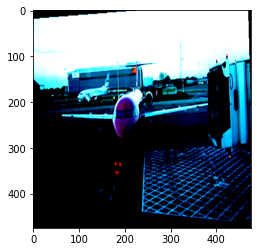

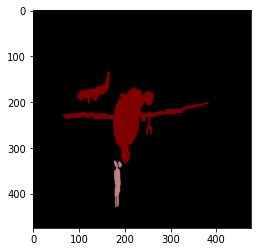

In [58]:
# 실행할 때마다 바뀝니다

# 화상 데이터 읽기
index = 0
imges, anno_class_imges = train_dataset.__getitem__(index)

# 화상 표시
img_train = imges
img_train = img_train.numpy().transpose((1, 2, 0))
plt.imshow(img_train)
plt.show()

# 어노테이션 화상 표시
anno_file_path = train_anno_list[0]
anno_class_img = Image.open(anno_file_path)   # [높이][폭][색RGB]
p_palette = anno_class_img.getpalette()

anno_class_img_train = anno_class_imges.numpy()
anno_class_img_train = Image.fromarray(np.uint8(anno_class_img_train), mode="P")
anno_class_img_train.putpalette(p_palette)
plt.imshow(anno_class_img_train)
plt.show()

#### Sample Val Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


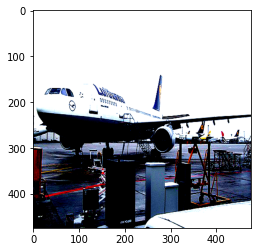

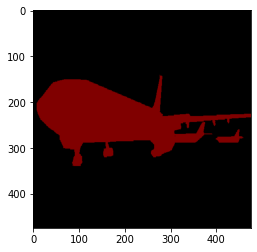

In [59]:
# 화상 데이터 읽기
index = 0
imges, anno_class_imges = val_dataset.__getitem__(index)

# 화상 표시
img_val = imges
img_val = img_val.numpy().transpose((1, 2, 0))
plt.imshow(img_val)
plt.show()

# 어노테이션 화상 표시
anno_file_path = train_anno_list[0]
anno_class_img = Image.open(anno_file_path)   # [높이][폭][색RGB]
p_palette = anno_class_img.getpalette()

anno_class_img_val = anno_class_imges.numpy()
anno_class_img_val = Image.fromarray(np.uint8(anno_class_img_val), mode="P")
anno_class_img_val.putpalette(p_palette)
plt.imshow(anno_class_img_val)
plt.show()

### PSPNet Class

In [64]:
class PSPNet(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # 파라미터 설정
        block_config = [3, 4, 6, 3] # resnet50
        img_size = 475
        img_size_8 = 60 # img_size의 약 1/8로 설정

        # 네 개의 모듈을 구성하는 서브 네트워크 준비
        # Feature 모듈 (Encoder)
        self.feature_conv = FeatureMap_convolution() 
        self.feature_res_1 = ResidualBlockPSP(
            n_blocks=block_config[0], in_channels=128, mid_channels=64,
            out_channels=256, stride=1, dilation=1)
        self.feature_res_2 = ResidualBlockPSP(
            n_blocks=block_config[1], in_channels=256, mid_channels=128,
            out_channels=512, stride=2, dilation=1)
        self.feature_dilated_res_1 = ResidualBlockPSP(
            n_blocks=block_config[2], in_channels=512, mid_channels=256,
            out_channels=1024, stride=1, dilation=2)
        self.feature_dilated_res_2 = ResidualBlockPSP(
            n_blocks=block_config[3], in_channels=1024, mid_channels=512,
            out_channels=2048, stride=1, dilation=4)
        
        # Pyramid Pooling 모듈 (서브 네트워크)
        self.pyramid_pooling = PyramidPooling(in_channels=2048, pool_sizes=[
            6, 3, 2, 1], height=img_size_8, width=img_size_8)
        
        # Decoder 모듈 (서브 네트워크)
        self.decode_feature = DecodePSPFeature(
            height=img_size, width=img_size, n_classes=n_classes)
        
        # AuxLoss 모듈 (서브 네트워크)
        self.aux = AuxiliaryPSPlayers(
            in_channels=1024, height=img_size, width=img_size, n_classes=n_classes)
        
    def forward(self, x):
        x = self.feature_conv(x)
        x = self.feature_res_1(x)
        x = self.feature_res_2(x)
        x = self.feature_dilated_res_1(x)

        output_aux = self.aux(x)  # Feature 모듈의 중간을 Aux 모듈로 사용

        x = self.feature_dilated_res_2(x)

        x = self.pyramid_pooling(x)
        output = self.decode_feature(x)

        return (output, output_aux)

### Feature Module

#### FeatureMap_convolution

In [65]:
class conv2DBatchNormRelu(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding,
                 dilation, bias):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, 
                              kernel_size, stride, padding, dilation, bias=bias)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        # inplace 설정으로 입력을 저장하지 않고 출력을 계산하여 메모리 절약

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        outputs = self.relu(x)

        return outputs

In [69]:
class FeatureMap_convolution(nn.Module):
    def __init__(self):
        '''구성할 네트워크 준비'''
        super().__init__()

        # 합성곱 층 1
        in_channels, out_channels, kernel_size, stride, padding, dilation, bias = 3, 64, 3, 2, 1, 1, False
        self.cbnr_1 = conv2DBatchNormRelu(
            in_channels, out_channels, kernel_size, stride, padding, dilation, bias)

        # 합성곱 층 2
        in_channels, out_channels, kernel_size, stride, padding, dilation, bias = 64, 64, 3, 1, 1, 1, False
        self.cbnr_2 = conv2DBatchNormRelu(
            in_channels, out_channels, kernel_size, stride, padding, dilation, bias)

        # 합성곱 층 3
        in_channels, out_channels, kernel_size, stride, padding, dilation, bias = 64, 128, 3, 1, 1, 1, False
        self.cbnr_3 = conv2DBatchNormRelu(
            in_channels, out_channels, kernel_size, stride, padding, dilation, bias)

        # 최대 풀링 층
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.cbnr_1(x)
        x = self.cbnr_2(x)
        x = self.cbnr_3(x)
        outputs = self.maxpool(x)

        return outputs

#### ResidualBlockPSP
- bottleNeckPSP 1개
- bottleNeckIdentifyPSP {n_blocks}개

In [70]:
class ResidualBlockPSP(nn.Sequential):
    def __init__(self, n_blocks, in_channels, mid_channels, out_channels, stride,
                 dilation):
        super().__init__()

        # bottleNeckPSP 준비
        self.add_module(
            "block1",
            bottleNeckPSP(in_channels, mid_channels,
                          out_channels, stride, dilation)
        )

        # bottleNeckIdentifyPSP 반복 준비
        for i in range(n_blocks - 1):
            self.add_module(
                "block" + str(i+2),
                bottleNeckIdentifyPSP(
                    output_channels, mid_channels, stride, dilation)
            )

##### bottleNeckPSP & bottleNeckIdentifyPSP

In [71]:
class conv2DBatchNorm(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding,
                 dilation, bias):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, 
                              kernel_size, stride, padding, dilation, bias=bias)
        self.batchnorm = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.conv(x)
        outputs = self.batchnorm(x)

        return outputs

In [72]:
class bottleNeckPSP(nn.Module):
    def __init__(self, in_channels, mid_channels, out_channels, stride, dilation):
        super().__init__()

        self.cbr_1 = conv2DBatchNormRelu(
            in_channels, mid_channels, kernel_size=1, stride=1, padding=0, 
            dilation=1, bias=False)
        self.cbr_2 = conv2DBatchNormRelu(
            mid_channels, mid_channels, kernel_size=3, stride=stride, 
            padding=dilation, dilation=dilation, bias=False)
        self.cb_3 = conv2DBatchNorm(
            mid_channels, out_channels, kernel_size=1, stride=1, padding=0, 
            dilation=1, bias=False)
        
        # Skip Connection
        self.cb_residual = conv2DBatchNorm(
            in_channels, out_channels, kernel_size=1, stride=stride, padding=0, 
            dilation=1, bias=False)
        
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        conv = self.cb_3(self.cbr_2(self.cbr_1(x)))
        residual = self.cb_residual(x)
        return self.relu(conv + residual) # f(x) + residual(x)

In [73]:
class bottleNeckIdentifyPSP(nn.Module):
    def __init__(self, in_channels, mid_channels, stride, dilation):
        super().__init__()

        self.cbr_1 = conv2DBatchNormRelu(
            in_channels, mid_channels, kernel_size=1, stride=1, padding=0, 
            dilation=1, bias=False)
        self.cbr_2 = conv2DBatchNormRelu(
            mid_channels, mid_channels, kernel_size=3, stride=1, 
            padding=dilation, dilation=dilation, bias=False)
        self.cb_3 = conv2DBatchNorm(
            mid_channels, in_channels, kernel_size=1, stride=1, padding=0, 
            dilation=1, bias=False)
        
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        conv = self.cb_3(self.cbr_2(self.cbr_1(x)))
        residual = x
        return self.relu(conv + residual) # f(x) + x 

### Pyramid Pooling Module